#e-Numpy (Kelompok 6)
- Ilham Taufiqurrohim
- Muhammad Chosasih Mahendra
- Putri Maylita
- Rama Putra
- Samuel Akwila


#STAGE 2 - DATA PRE-PROCESSING

##Data Cleansing

In [1]:
#Import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12,12
pd.set_option('display.max_columns',None)

In [3]:
#Baca dataset

df = pd.read_csv('/content/Employee_Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
#Memisahkan kolom numeric dan categorical

numeric = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate',
           'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
           'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear', 
           'YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager']
           
categorical = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
               'JobRole', 'MaritalStatus', 'OverTime', 'Education', 'EnvironmentSatisfaction',
               'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating',
               'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

###Handle Missing and Duplicated Value

In [5]:
duplicate = df.duplicated().sum()
missing = df.isnull().sum()
print(f'Jumlah duplicated value:    {duplicate}')
print(f'Jumlah missing value:\n{missing}')

Jumlah duplicated value:    0
Jumlah missing value:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany    

**Pengamatan:**

Data tidak memiliki nilai yang duplikat dan seluruh kolom dalam data tidak memiliki nilai kosong.

### Handle Irrelevant Columns

**Pengamatan:**

Berdasarkan EDA di Stage 1, terdapat beberapa kolom yang tidak memiliki relevansi terhadap variabel target karena hanya memiliki satu unique value **`(EmployeeCount, StandardHours, dan Over18)`** dan merupakan informasi ID pegawai **(EmployeeNumber)**. Oleh karena itu, drop kolom-kolom tersebut.

In [6]:
#Melihat summary data
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
#Melihat summary data
df.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [8]:
df = df.drop(columns=['EmployeeCount','EmployeeNumber', 'StandardHours', 'Over18'], axis=1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


### Handle Outliers

In [9]:
#Melihat ukuran data sebelum penghapusan outliers
df.shape

(1470, 31)

Pengamatan:

Berdasarkan EDA, kolom yang memiliki oultiers cukup banyak dan jauh dari titik maksimalnya adalah **`'MonthlyIncome','YearsAtCompany', 'TotalWorkingYears', 'YearsSinceLastPromotion'.`** Oleh karena itu kita hapus beberapa outlier tersebut. Secara logika juga apabila seseorang telah bekerja lebih dari 35 tahun di sebuah perusahaan, kecil kemungkinan seseorang tersebut untuk pindah ke perusahaan lain.

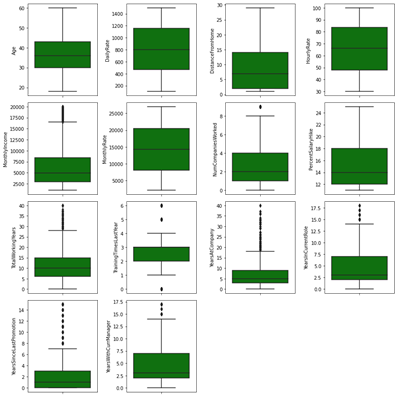

In [10]:
#Penghapusan outliers menggunakan metode z score
df_outlier_clean = df.copy()

import scipy.stats as st

outliers = ['MonthlyIncome','YearsAtCompany', 'TotalWorkingYears', 'YearsSinceLastPromotion']
for i in outliers:
  z_scores = np.abs(st.zscore(df_outlier_clean[i]))
  filtered_entries = (z_scores < 3)
  df_outlier_clean = df_outlier_clean[filtered_entries]


df_outlier_clean.shape

(1400, 31)

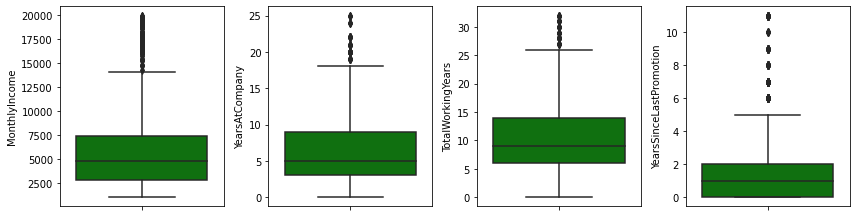

In [11]:
#Check ulang distribusi data menggunakan boxplot

for i in range(0, len(outliers)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df_outlier_clean[outliers[i]], color='green', orient='v')
    plt.tight_layout()

**Pengamatan:** 

Penghapusan outliers menggunakan metode Z Score > 3 membuat data terhapus sebanyak 70 baris, dari 1470 menjadi 1400 baris. Pemilihan metode ini dikarenakan model yang dibuat ingin lebih robust terhadap outlier yang Z Score nya masih dibawah 3.

###Feature Transformation

####Log Transform

**Pengamatan:**

Berdasarkan analisis di Stage 1, kolom yang sangat skew adalah:**` MonthlyIncome, NumCompaniesWorked, PercentSalaryHike, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager.`**

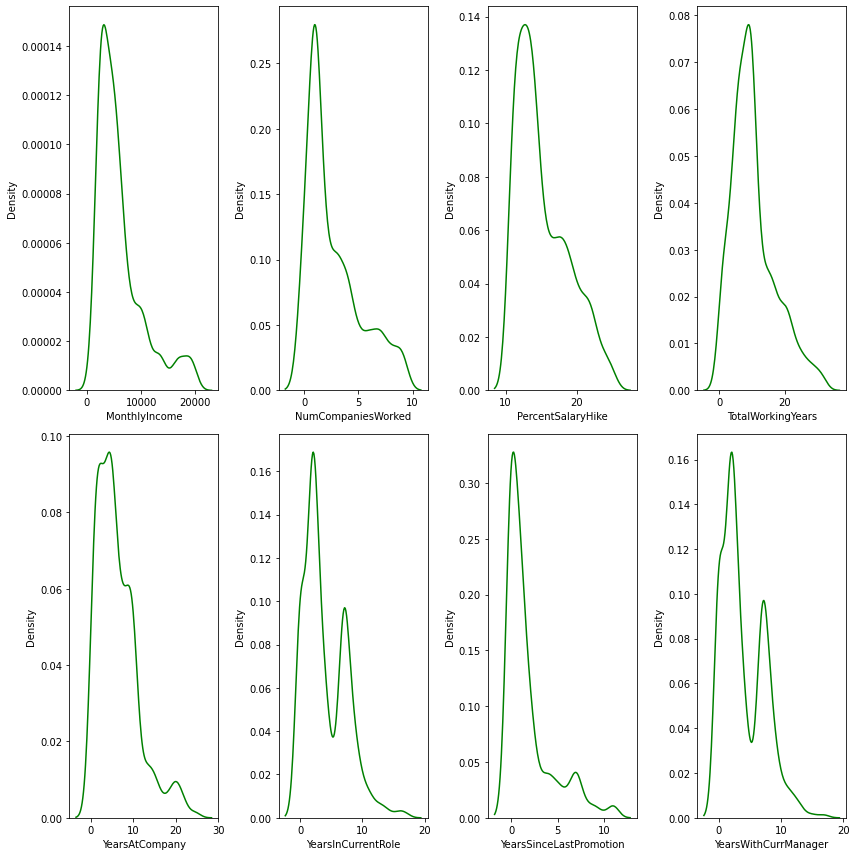

In [12]:
# Mengelompokkan kolom yang perlu di transformasi
skew = ['MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
        
# Visualisasi ulang untuk komparasi
for i in range(0, len(skew)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=df_outlier_clean[skew[i]], color='green')
    plt.xlabel(skew[i])
    plt.tight_layout()

In [13]:
#Melakukan transformasi menggunakan metode log transform (x+1)
df_transform = df_outlier_clean.copy()

df_transform.loc[:, skew] = np.log(df_transform[skew] + 1)
df_transform[skew].head()

,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,8.698514,2.197225,2.484907,2.197225,1.945910,1.609438,0.000000,1.791759
1,8.543056,0.693147,3.178054,2.397895,2.397895,2.079442,0.693147,2.079442
2,7.645398,1.945910,2.772589,2.079442,0.000000,0.000000,0.000000,0.000000
3,7.975908,0.693147,2.484907,2.197225,2.197225,2.079442,1.386294,0.000000
4,8.151622,2.302585,2.564949,1.945910,1.098612,1.098612,1.098612,1.098612


Melihat referensi dari [website](https://discuss.analyticsvidhya.com/t/methods-to-deal-with-zero-values-while-performing-log-transformation-of-variable/2431), metode untuk transformasi kolom yang memiliki value 0 dan cukup kuat untuk menghandle skewness tinggi yaitu menggunakan log (x+1) transform, karena apabila hanya menggunakan log transform, kolom yang memiliki value 0 akan berubah menjadi -inf.

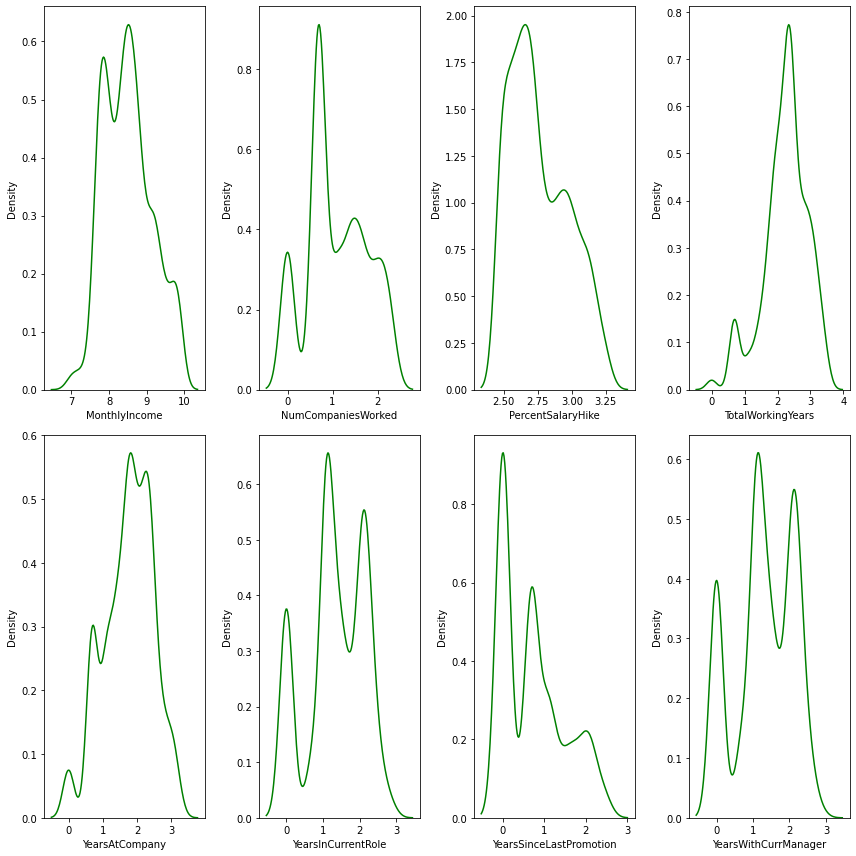

In [14]:
#Distribusi data setelah dilakukan transformasi

for i in range(0, len(skew)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=df_transform[skew[i]], color='green')
    plt.xlabel(skew[i])
    plt.tight_layout()

#### Normalisasi

In [15]:
#Normalisasi numeric data menggunakan StandardScaler
df_standard = df_transform.copy()

from sklearn.preprocessing import StandardScaler
df_standard[numeric] = StandardScaler().fit_transform(df_standard[numeric].values.reshape(len(df_standard),14))

In [16]:
df_standard.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.532606,Yes,Travel_Rarely,0.734948,Sales,-1.011817,2,Life Sciences,2,Female,1.383985,3,2,Sales Executive,4,Single,0.306459,0.737802,1.669283,Yes,-1.300405,3,1,0,-0.063889,-2.183502,1,0.273334,0.349193,-0.968892,0.606468
1,1.440410,No,Travel_Frequently,-1.303625,Research & Development,-0.145429,1,Life Sciences,3,Male,-0.242410,2,2,Research Scientist,2,Married,0.061858,1.504353,-0.580566,No,1.948286,4,4,1,0.235914,0.150012,3,0.906691,0.950855,-0.041169,0.968814
2,0.078703,Yes,Travel_Rarely,1.406215,Research & Development,-0.888048,2,Other,4,Male,1.285416,2,1,Laboratory Technician,3,Single,-1.350531,-1.674685,1.293359,Yes,0.047923,3,2,0,-0.239858,0.150012,3,-2.453429,-1.711085,-0.968892,-1.650316
3,-0.375199,No,Travel_Frequently,1.453278,Research & Development,-0.764278,4,Life Sciences,4,Female,-0.488834,3,1,Research Scientist,3,Married,-0.830500,1.257497,-0.580566,Yes,-1.300405,3,3,0,-0.063889,0.150012,3,0.625495,0.950855,0.886554,-1.650316
4,-1.056052,No,Travel_Rarely,-0.530800,Research & Development,-0.888048,1,Medical,1,Male,-1.277390,3,1,Laboratory Technician,2,Married,-0.554030,0.335744,1.826885,No,-0.925255,3,4,1,-0.439355,0.150012,3,-0.913967,-0.304727,0.501514,-0.266575


###Feature Encoding

In [17]:
#Label encoding
df_label = df_standard.copy()

label_encoding = {"Attrition": {'No':0, "Yes": 1},
                  "BusinessTravel": {"Non-Travel":0, "Travel_Rarely": 1, "Travel_Frequently":2},
                  "OverTime": {"No":0, "Yes": 1}}

df_label[['Attrition', 'BusinessTravel', 'OverTime']]=df_label[['Attrition', 'BusinessTravel', 'OverTime']].replace(label_encoding)
df_label[['Attrition', 'BusinessTravel', 'OverTime']].head()

,Attrition,BusinessTravel,OverTime
0,1,1,1
1,0,2,0
2,1,1,1
3,0,2,1
4,0,1,0


In [18]:
#One Hot Encoding

for i in ['Department', 'EducationField','Gender' ,'JobRole', 'MaritalStatus']:
    onehots = pd.get_dummies(df_label[i], prefix=i)
    df_label = df_label.join(onehots)
    
df_label = df_label.drop(columns=['Department', 'EducationField','Gender' ,'JobRole', 'MaritalStatus'], axis =1)
df_label.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.532606,1,1,0.734948,-1.011817,2,2,1.383985,3,2,4,0.306459,0.737802,1.669283,1,-1.300405,3,1,0,-0.063889,-2.183502,1,0.273334,0.349193,-0.968892,0.606468,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1.440410,0,2,-1.303625,-0.145429,1,3,-0.242410,2,2,2,0.061858,1.504353,-0.580566,0,1.948286,4,4,1,0.235914,0.150012,3,0.906691,0.950855,-0.041169,0.968814,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,0.078703,1,1,1.406215,-0.888048,2,4,1.285416,2,1,3,-1.350531,-1.674685,1.293359,1,0.047923,3,2,0,-0.239858,0.150012,3,-2.453429,-1.711085,-0.968892,-1.650316,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,-0.375199,0,2,1.453278,-0.764278,4,4,-0.488834,3,1,3,-0.830500,1.257497,-0.580566,1,-1.300405,3,3,0,-0.063889,0.150012,3,0.625495,0.950855,0.886554,-1.650316,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,-1.056052,0,1,-0.530800,-0.888048,1,1,-1.277390,3,1,2,-0.554030,0.335744,1.826885,0,-0.925255,3,4,1,-0.439355,0.150012,3,-0.913967,-0.304727,0.501514,-0.266575,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


##Feature Engineering

### Feature Selection

In [19]:
df_label.corr()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
Age,1.000000,-0.161319,-0.012283,0.025024,-0.006331,0.196472,0.001058,0.029181,0.039216,0.452378,0.008995,0.441240,0.017076,0.337219,0.031173,0.006009,-0.000873,0.047037,0.051495,0.614974,-0.013635,-0.015451,0.186818,0.129162,0.118610,0.123475,0.009447,0.027282,-0.032300,-0.002241,0.014301,0.035650,-0.011412,-0.038010,-0.012759,0.043414,-0.043414,0.104596,-0.017973,-0.122760,0.252247,0.054319,0.156328,-0.122282,0.012054,-0.169355,0.038367,0.091240,-0.131583
Attrition,-0.161319,1.000000,0.128155,-0.055968,0.081485,-0.032614,-0.107281,-0.003079,-0.132762,-0.174982,-0.112511,-0.202148,0.017838,0.047583,0.257328,-0.010959,0.009813,-0.052347,-0.136400,-0.240659,-0.058334,-0.063605,-0.214413,-0.196059,-0.049508,-0.199238,0.024351,-0.089351,0.081822,0.042443,-0.035538,0.059091,-0.042787,-0.016086,0.059418,-0.037842,0.037842,-0.082672,0.035682,0.095547,-0.069945,-0.088703,-0.098363,-0.002852,0.015296,0.158829,-0.081688,-0.101435,0.180990
BusinessTravel,-0.012283,0.128155,1.000000,-0.020359,-0.016919,-0.016464,-0.013239,-0.003780,0.030301,-0.017391,0.008975,-0.010902,-0.010835,-0.026553,0.041541,-0.028037,0.005841,0.021693,-0.030630,0.016431,0.014743,0.017515,0.008469,0.015592,0.013284,-0.002992,-0.006533,0.006766,-0.004164,-0.001446,0.018290,0.004952,-0.011204,0.001328,-0.018799,0.046504,-0.046504,-0.002570,0.010933,0.003665,-0.037991,0.013828,-0.004155,0.003491,-0.032332,0.061774,-0.024189,-0.005686,0.027580
DailyRate,0.025024,-0.055968,-0.020359,1.000000,-0.004038,-0.012742,0.029107,0.016984,0.054266,0.024597,0.036258,0.031428,-0.027985,0.035909,0.018372,0.025010,-0.003188,0.007997,0.046151,0.039858,0.003693,-0.044489,0.003063,0.013341,-0.036567,0.008048,-0.019514,0.013956,-0.005971,-0.033617,-0.000268,-0.068958,0.037419,0.005574,0.025010,0.006143,-0.006143,0.036957,-0.023045,-0.010754,0.014008,-0.016208,0.011810,-0.003640,-0.005143,0.003767,0.036134,0.039784,-0.074627
DistanceFromHome,-0.006331,0.081485,-0.016919,-0.004038,1.000000,0.001501,-0.018856,0.026482,0.008895,0.008231,-0.009634,0.008950,0.029215,-0.012495,0.025797,0.029028,0.020935,0.007566,0.051750,0.018130,-0.033610,-0.041248,0.014538,0.019966,0.002408,-0.008362,-0.016037,-0.014966,0.022424,-0.014269,-0.025630,0.043947,0.016101,-0.012193,-0.013014,0.003790,-0.003790,0.020448,-0.024356,0.011481,-0.033170,0.014094,-0.033599,-0.014581,0.034407,-0.015919,0.005100,0.024034,-0.030210
Education,0.196472,-0.032614,-0.016464,-0.012742,0.001501,1.000000,-0.032132,0.012632,0.043507,0.082014,-0.011990,0.106040,-0.023458,0.140276,-0.016853,-0.013289,-0.030459,-0.003153,0.030604,0.160371,-0.026042,0.009842,0.039444,0.046768,0.027728,0.026514,0.003528,-0.019126,0.018244,0.018918,0.009299,0.084712,-0.076923,0.045927,-0.028090,0.021373,-0.021373,0.028946,-0.002267,-0.058662,-0.001047,-0.008411,0.038980,0.007121,0.066335,-0.089865,0.008421,0.003637,-0.011372
EnvironmentSatisfaction,0.001058,-0.107281,-0.013239,0.029107,-0.018856,-0.032132,1.000000,-0.043937,-0.014343,-0.004620,-0.007900,-0.024023,0.035814,0.002459,0.068339,-0.

Pengamatan:

- Terdapat beberapa fitur yang memiliki korelasi yang tinggi atau fitur yang redundan. Oleh karena itu perlu dilakukan penghapusan fitur-fitur yang memiliki korelasi tinggi (>0.7). Tidak menghapus kedua fitur yang berkorelasi tinggi, tetapi tetap mempertahankan salah satu fitur tersebut yang memiliki korelasi lebih tinggi ke **`Attrition`**.
- Menghapus fitur yang memiliki korelasi sangat rendah ke **`Attrition`**. Threshold yang diterapkan adalah korelasi < ± 0.1.

In [20]:
#Drop fitur yang memiliki korelasi sangat rendah ke Attrition

low_correlation = df_label.corr()
selection = low_correlation[abs(low_correlation['Attrition']) > abs(0.1)]
index_values = selection.index.values
correlation_1 = selection[index_values]
correlation_1

,Age,Attrition,BusinessTravel,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
Age,1.000000,-0.161319,-0.012283,0.001058,0.039216,0.452378,0.008995,0.441240,0.031173,0.051495,0.614974,0.186818,0.129162,0.123475,-0.169355,0.091240,-0.131583
Attrition,-0.161319,1.000000,0.128155,-0.107281,-0.132762,-0.174982,-0.112511,-0.202148,0.257328,-0.136400,-0.240659,-0.214413,-0.196059,-0.199238,0.158829,-0.101435,0.180990
BusinessTravel,-0.012283,0.128155,1.000000,-0.013239,0.030301,-0.017391,0.008975,-0.010902,0.041541,-0.030630,0.016431,0.008469,0.015592,-0.002992,0.061774,-0.005686,0.027580
EnvironmentSatisfaction,0.001058,-0.107281,-0.013239,1.000000,-0.014343,-0.004620,-0.007900,-0.024023,0.068339,0.010338,-0.036342,0.000349,0.014526,-0.003289,0.004579,-0.016710,0.003754
JobInvolvement,0.039216,-0.132762,0.030301,-0.014343,1.000000,-0.005379,-0.002535,-0.011731,0.000124,0.021940,0.023509,0.025901,0.023945,0.052940,-0.029076,0.037889,-0.054593
JobLevel,0.452378,-0.174982,-0.017391,-0.004620,-0.005379,1.000000,0.016292,0.910991,-0.002790,0.019775,0.670326,0.373943,0.279099,0.272389,-0.216534,0.058325,-0.094384
JobSatisfaction,0.008995,-0.112511,0.008975,-0.007900,-0.002535,0.016292,1.000000,0.009947,0.024168,0.013877,-0.008767,0.022799,0.007727,-0.002868,-0.000828,-0.014195,0.023815
MonthlyIncome,0.441240,-0.202148,-0.010902,-0.024023,-0.011731,0.910991,0.009947,1.000000,0.008015,0.025939,0.702985,0.411613,0.335993,0.312477,-0.268249,0.069180,-0.102572
OverTime,0.031173,0.257328,0.041541,0.068339,0.000124,-0.002790,0.024168,0.008015,1.000000,-0.001670,0.001233,-0.039470,-0.039418,-0.034421,0.003111,-0.007430,-0.003533
StockOptionLevel,0.051495,-0.136400,-0.030630,0.010338,0.021940,0.019775,0.013877,0.025939,-0.001670,1.000000,0.050105,0.059766,0.065621,0.060074,-0.049825,0.229246,-0.640263


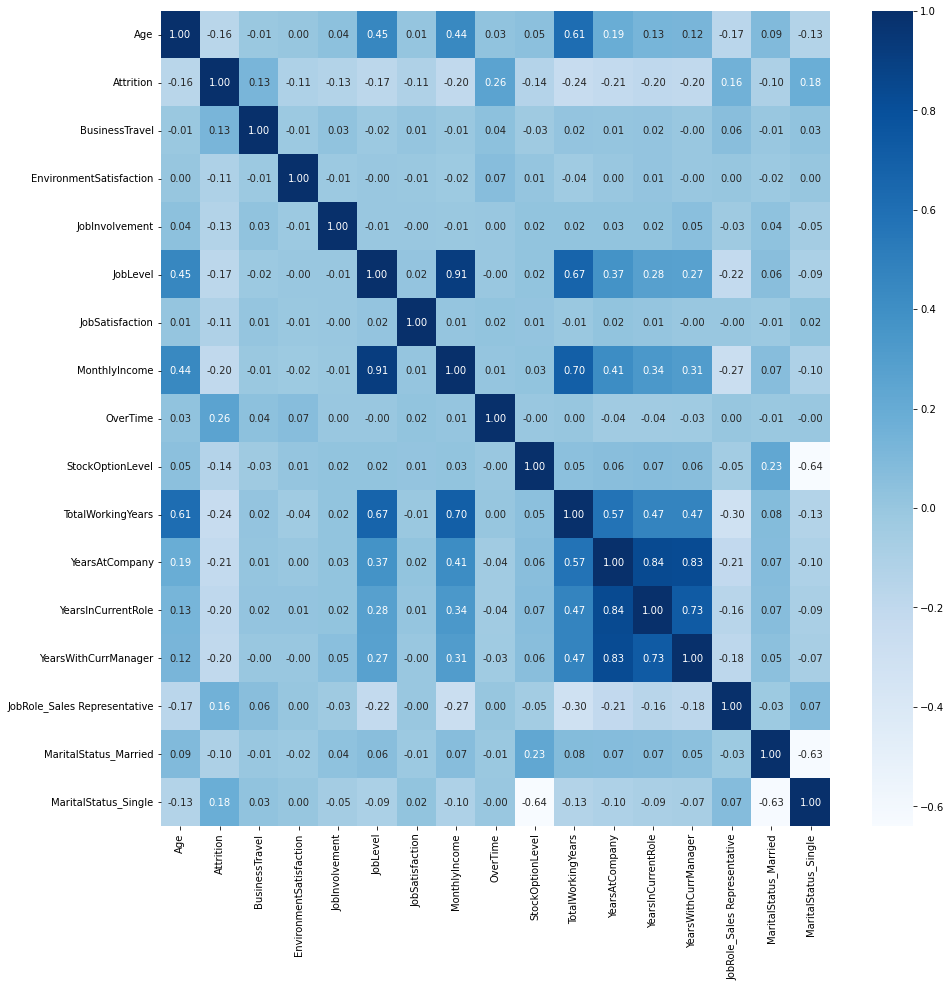

In [21]:
# Visualisasi korelasi fitur

plt.figure(figsize=(15,15))
mask = np.triu(np.ones_like(correlation_1))
sns.heatmap(correlation_1, cmap="Blues", annot=True, fmt='.2f')
plt.show()

In [22]:
# Drop fitur yang redundan

correlation_1 = correlation_1.drop(['MonthlyIncome', 'YearsInCurrentRole', 'YearsWithCurrManager'], axis = 1)
correlation_1 = correlation_1.drop(['MonthlyIncome', 'YearsInCurrentRole', 'YearsWithCurrManager'], axis = 0)

In [23]:
# Masukkan list kolom yang dipilih ke dataframe

df_clean = df_label.copy()
df_clean = df_label[list(correlation_1.columns)]
df_clean

,Age,Attrition,BusinessTravel,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0.532606,1,1,2,3,2,4,1,0,-0.063889,0.273334,0,0,1
1,1.440410,0,2,3,2,2,2,0,1,0.235914,0.906691,0,1,0
2,0.078703,1,1,4,2,1,3,1,0,-0.239858,-2.453429,0,0,1
3,-0.375199,0,2,4,3,1,3,1,0,-0.063889,0.625495,0,1,0
4,-1.056052,0,1,1,3,1,2,0,1,-0.439355,-0.913967,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.034772,0,2,3,4,2,4,0,1,0.971677,0.057326,0,1,0
1466,0.305654,0,1,4,2,3,1,0,1,0.093520,0.460448,0,1,0
1467,-1.056052,0,1,2,4,2,2,1,1,-0.439355,0.273334,0,1,0
1468,1.440410,0,2,4,2,2,2,0,0,0.971677,0.773135,0,1,0


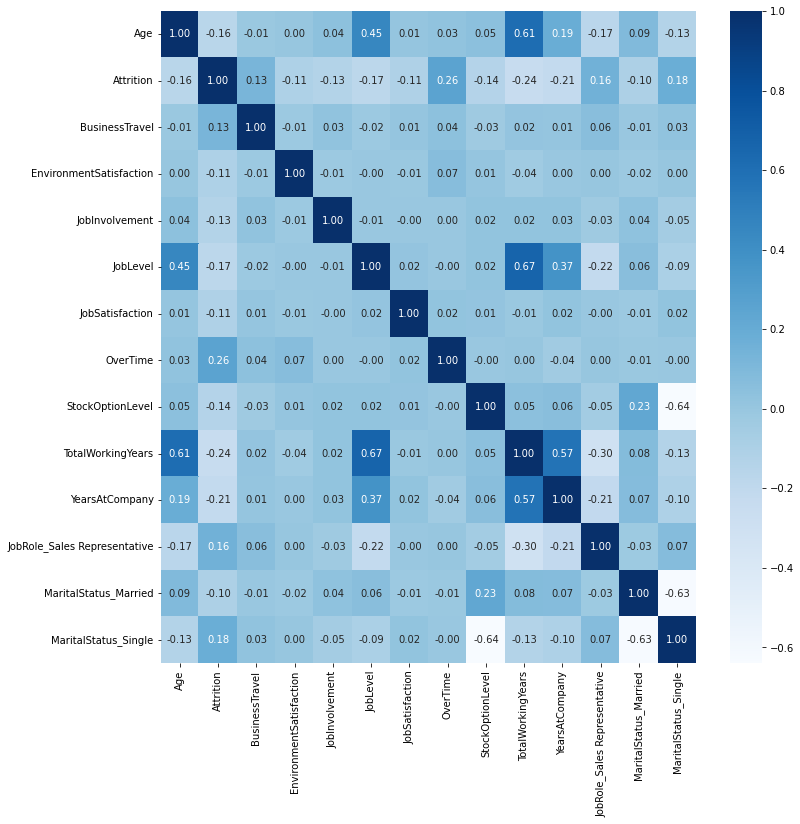

In [24]:
# Visualisasi ulang fitur-fitur

sns.heatmap(df_clean.corr(), cmap="Blues", annot=True, fmt='.2f')
plt.show()

Pengamatan: Sudah tidak ada fitur yang dianggap redundan (korelasi > 0.7) dan tidak ada fitur yang korelasinya sangat rendah (< 0.1) ke Attrition.

### Feature Extraction

Pada dataset ini tidak diperlukan melakukan feature extraction karena fitur-fitur yang ada pada dataset ini sudah tidak dapat diekstraksi lebih lagi menjadi fitur baru

###Handle Class Imbalance

**Pengamatan:**
Berdasarkan analisis pada stage 1 Feature Attrition yang  menjadi feature target memiliki ketimpangan antara yang melakukan attrition dengan yang tidak melakukan attrition, sehingga dilakukan undersampling dengan menghapus data yang tidak melakukan attrition, oversampling dengan menduplikat data yang melakukan attrition, dan SMOTE dengan membuat data sintetik yang melakukan attrition.

In [25]:
# Pemisahan Features vs Target
X = df_clean.drop(columns=['Attrition'], axis=1)
y = df_clean['Attrition']
print(X.shape)
print(y.shape)

(1400, 13)
(1400,)


In [26]:
#Resampling
from imblearn import under_sampling, over_sampling

X_over, y_over = over_sampling.RandomOverSampler(0.5).fit_resample(X, y)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.5).fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [27]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
0    1171
1     229
Name: Attrition, dtype: int64


OVERSAMPLING
0    1171
1     585
Name: Attrition, dtype: int64


SMOTE
0    1171
1     585
Name: Attrition, dtype: int64
